# HMMA 307 : Analyse de la covariance sur les données Crickets de Walker 
## Travail fait par : SAYD Yassine 
### M2 MIND 2020-2021

## 1. Importation et nettoyage des données :

In [2]:
import numpy as np
import pandas as pd
import csv

In [3]:
data = pd.read_csv("C:/Users/33665/Desktop/Crickets.csv")
#Importation des données

In [4]:
print(type(data))
#Format des données

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(data.shape)
#Taille du dataframe

(17, 5)


In [6]:
print(data)
#Affichage des données (il y a une colonne en trop)

    Unnamed: 0  TempEx  ImpulsionEx  TempNiv  ImpulsionNiv
0            1    20.8         67.9     17.2          44.3
1            2    20.8         65.1     18.3          47.2
2            3    24.0         77.3     18.3          47.6
3            4    24.0         78.7     18.3          49.6
4            5    24.0         79.4     18.9          50.3
5            6    24.0         80.4     18.9          51.8
6            7    26.2         85.8     20.4          60.0
7            8    26.2         86.6     21.0          58.5
8            9    26.2         87.5     21.0          58.9
9           10    26.2         89.1     22.1          60.7
10          11    28.4         98.6     23.5          69.8
11          12    29.0        100.8     24.2          70.9
12          13    30.4         99.3     25.9          76.2
13          14    30.4        101.7     26.5          76.1
14          15     NaN          NaN     26.5          77.0
15          16     NaN          NaN     26.5          77

In [7]:
Crickets = data.drop(["Unnamed: 0"] , axis = 1)
#Supression de la 1ère colonne (inutile)

In [8]:
print(Crickets)
#Affichage du dataframe

    TempEx  ImpulsionEx  TempNiv  ImpulsionNiv
0     20.8         67.9     17.2          44.3
1     20.8         65.1     18.3          47.2
2     24.0         77.3     18.3          47.6
3     24.0         78.7     18.3          49.6
4     24.0         79.4     18.9          50.3
5     24.0         80.4     18.9          51.8
6     26.2         85.8     20.4          60.0
7     26.2         86.6     21.0          58.5
8     26.2         87.5     21.0          58.9
9     26.2         89.1     22.1          60.7
10    28.4         98.6     23.5          69.8
11    29.0        100.8     24.2          70.9
12    30.4         99.3     25.9          76.2
13    30.4        101.7     26.5          76.1
14     NaN          NaN     26.5          77.0
15     NaN          NaN     26.5          77.7
16     NaN          NaN     28.6          84.7


## 2. Analyse descriptive :

In [9]:
print(Crickets.dtypes)
#Nature des variables
#TempEx correspond à la Températue en degrès Celsus chez les grillons Oecanthus exclamationis 
#TempEx correspond à la Températue en degrès Celsus chez les grillons Oecanthus niveus
#ImpulsionEx correspond au nombre d'impulsions de chant par seconde chez les grillons Oecanthus exclamationis
#ImpulsionNiv correspond au nombre d'impulsions de chant par seconde chez les grillons Oecanthus niveus

TempEx          float64
ImpulsionEx     float64
TempNiv         float64
ImpulsionNiv    float64
dtype: object


In [10]:
print(Crickets.describe(include='all'))
#Summary des varaibles (nombre total,moyenne,écart-type,min,1er quartile,médiane,3ème quartile,max)

          TempEx  ImpulsionEx    TempNiv  ImpulsionNiv
count  14.000000    14.000000  17.000000     17.000000
mean   25.757143    85.585714  22.123529     62.429412
std     3.074639    11.699300   3.659325     12.956840
min    20.800000    65.100000  17.200000     44.300000
25%    24.000000    78.875000  18.900000     50.300000
50%    26.200000    86.200000  21.000000     60.000000
75%    27.850000    96.225000  25.900000     76.100000
max    30.400000   101.700000  28.600000     84.700000


In [11]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E88C60BE88>]],
      dtype=object)

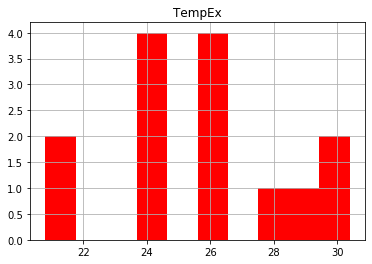

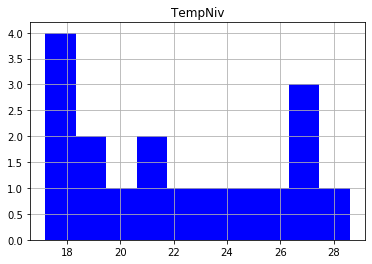

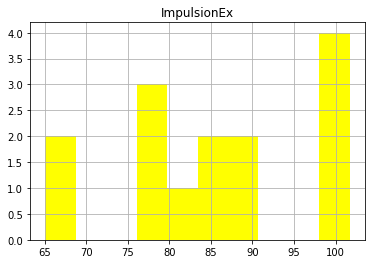

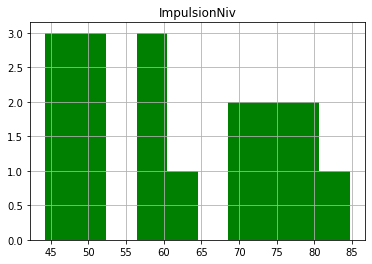

In [12]:
Crickets.hist(column='TempEx', color='red')
Crickets.hist(column='TempNiv', color='blue')
Crickets.hist(column='ImpulsionEx', color='yellow')
Crickets.hist(column='ImpulsionNiv', color='green')
#Histogrammes des 4 variables

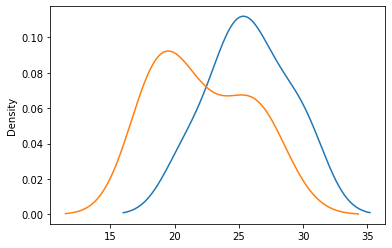

In [13]:
Crickets['TempEx'].plot.kde()
Crickets['TempNiv'].plot.kde()
#Comparaison de la distribution de la température chez les Oecanthus exclamationis (bleu) et chez les Oecanthus niveus (orange)

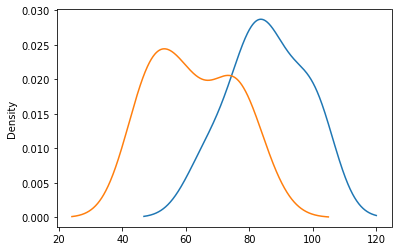

In [14]:
Crickets['ImpulsionEx'].plot.kde()
Crickets['ImpulsionNiv'].plot.kde()
#Comparaison de la distribution du nombre d'impulsions de chant chez les Oecanthus exclamationis (bleu) et chez les Oecanthus niveus (orange)

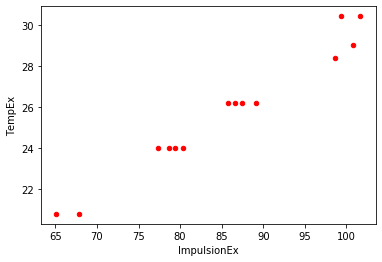

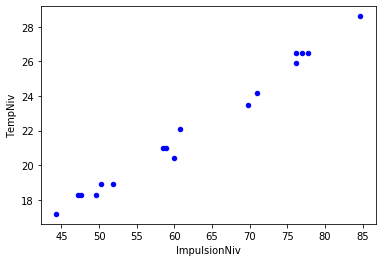

In [15]:
Crickets.plot.scatter(x='ImpulsionEx',y='TempEx', color='red')
Crickets.plot.scatter(x='ImpulsionNiv',y='TempNiv', color='blue')
#Tracé des scattergraphs du nombre d'impulsions en fonction de la température

## 3. Test de Student :

In [46]:
import scipy.stats as stats

Dans un premier temps, on ignore les températures et on compare simplement les fréquences d’impulsion moyennes chez les 2 groupes.
A cause des valeurs manquantes (NaN), nous allons taper les valeurs à la main.

In [43]:
ImpEx= [67.9,65.1,77.3,78.7,79.4,80.4,85.8,86.6,87.5,89.1,98.6,100.8,99.3,101.7]
ImpNiv= [44.3,47.2,47.6,49.6,50.3,51.8,60.0,58.5,58.9,60.7,69.8,70.9,76.2,76.1,77.0,77.7,84.7]

In [44]:
#On effectue le test de Student pour vérifier l'égalité des moyennes des fréquences d’impulsion chez les 2 groupes
scipy.stats.ttest_ind(ImpEx,ImpNiv)

Ttest_indResult(statistic=5.170637408108505, pvalue=1.5785582214802644e-05)

La p-value de l'ordre de 2×10−5, donc on rejette l'hypothèse nulle. Oecanthus exclamationis a un taux plus élevé que Oecanthus niveus, et la différence des moyennes est très significatives (23.2).

In [22]:
#On peut également utiliser cette commande-là pour calculer les moyennes chez les 2 groupes : 
print(Crickets['ImpulsionEx'].mean())
print(Crickets['ImpulsionNiv'].mean())

85.58571428571429
62.42941176470588


## 4. Ancova : 

Comme la température moyenne pour les mesures Oecanthus exclamationis était de 3,6 °C plus élevé que pour Oecanthus niveus, il est insensé de négliger la température. Oecanthus exclamationis pourrait avoir un taux plus élevé que Oecanthus niveus à certaines températures, mais pas d’autres. 

On peut contrôler la température avec l’ancova, qui nous dira si la ligne de régression pour Oecanthus exclamationis est plus élevée que la ligne pour Oecanthus niveus; si c’est le cas, cela signifie que Oecanthus exclamationis aurait un taux de pouls plus élevé à n’importe quelle température.

In [204]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
import seaborn as sns
sns.set_style("darkgrid")

In [102]:
#Régression OLS chez les Oecanthus exclamationis
model1 = ols("ImpulsionEx~TempEx",data=Crickets).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            ImpulsionEx   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     416.6
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.10e-10
Time:                        15:11:19   Log-Likelihood:                -28.751
No. Observations:                  14   AIC:                             61.50
Df Residuals:                      12   BIC:                             62.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0408      4.765     -2.317      0.0

Y_1 = 3.75X_1 - 11.04 où Y_1: Le nombre d'impulsions par seconde chez les Oecanthus exclamationis et X-1: Température en degrès Celsus

In [108]:
aov1 = sm.stats.anova_lm(model1, type=2)
print(aov1)

            df       sum_sq      mean_sq           F        PR(>F)
TempEx     1.0  1729.535079  1729.535079  416.570878  1.100375e-10
Residual  12.0    49.822064     4.151839         NaN           NaN


p-value = 1.100375e-10 

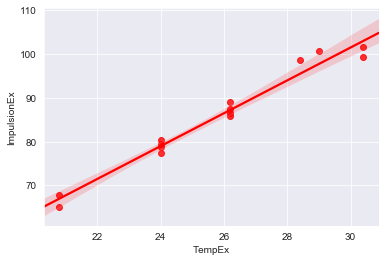

In [103]:
#Tracé des lignes de régression chez les Oecanthus exclamationis 
ax1 = sns.regplot(x="TempEx", y="ImpulsionEx", data=Crickets, color='r')

In [87]:
#Régression OLS chez les Oecanthus niveus
model2 = ols("ImpulsionNiv~TempNiv",data=Crickets).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           ImpulsionNiv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.57e-15
Time:                        14:44:15   Log-Likelihood:                -30.321
No. Observations:                  17   AIC:                             64.64
Df Residuals:                      15   BIC:                             66.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.3893      2.347     -6.558      0.0

C:\Users\33665\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


Y_2 = 3.52X_1 - 15.40 où Y_2: Le nombre d'impulsions par seconde chez les Oecanthus niveus et X_2: Température en degrès Celsus

In [93]:
aov2 = sm.stats.anova_lm(model2)
print(aov2)

            df       sum_sq      mean_sq            F        PR(>F)
TempNiv    1.0  2650.823268  2650.823268  1127.945082  1.565616e-15
Residual  15.0    35.252026     2.350135          NaN           NaN


p-value = 1.565616e-15

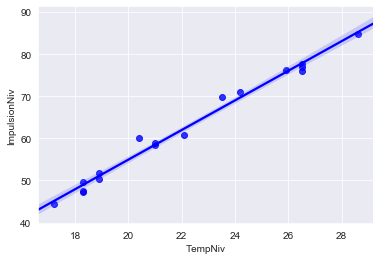

In [104]:
#Tracé des lignes de régression chez les Oecanthus niveus
ax2 = sns.regplot(x="TempNiv", y="ImpulsionNiv", data=Crickets, color='b')

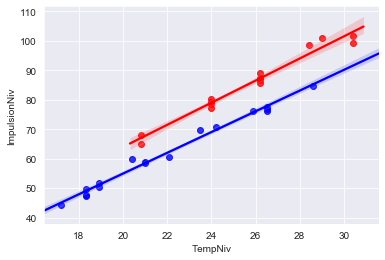

In [105]:
#Superposition des lignes de régression chez les Oecanthus exclamationis (rouge) et chez les Oecanthus niveus (bleu)
ax1 = sns.regplot(x="TempEx", y="ImpulsionEx", data=Crickets, color='r')
ax2 = sns.regplot(x="TempNiv", y="ImpulsionNiv", data=Crickets, color='b')

La ligne de régression pour Oecanthus exclamationis est plus élevée que la ligne pour Oecanthus niveus; cela signifie que Oecanthus exclamationis aurait un taux de pouls plus élevé à n’importe quelle température.

La première hypothèse nulle de l’ancova est que les pentes des lignes de régression sont toutes égales; en d’autres termes, que les lignes de régression sont parallèles les unes aux autres. On va acceptez l’hypothèse nulle selon laquelle les lignes de régression sont parallèles et nous testerons la deuxième hypothèse nulle : que les interceptions des lignes de régression sont toutes les mêmes.

Les pentes ne sont pas significativement différentes (P=0,25); la pente commune est de 3,60, ce qui se trouve entre les pentes pour les lignes séparées (3,52 et 3,75). Sur cette partie-là, je n'ai pas réussi à tester cette hypothèse.

Ancova fait les mêmes hypothèses que la régression linéaire : normalité et homoscédasticité de Y pour chaque valeur de X, et indépendance. Vérifions au moins l'hypothèse de normalité. 

In [202]:
#Test de Shapiro chez les Oecanthus exclamationis
stats.shapiro(model1.resid)

(0.972694456577301, 0.9104770421981812)

W= 0.9727, p= 0.9105 donc les résidus sont bien distribués suivant la loi normale chez les Oecanthus exclamationis

In [203]:
#Test de Shapiro chez les Oecanthus niveus
stats.shapiro(model2.resid)

(0.915918231010437, 0.1259610801935196)

W= 0.9159, p= 0.1259 donc les résidus sont bien distribués suivant la loi normale chez les Oecanthus niveus

Maintenant procédons à un test de Tukey sous l'hypothèse que leurs pentes sont toutes les mêmes

In [188]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [189]:
cm1 = pairwise_tukeyhsd(Crickets['ImpulsionEx'], Crickets['TempEx'], alpha = 0.05)
print (cm1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
  20.8   24.0    12.45 0.5566   nan   nan  False
  20.8   26.2    20.75 0.5566   nan   nan  False
  20.8   28.4     32.1 0.5566   nan   nan  False
  20.8   29.0     34.3 0.5566   nan   nan  False
  20.8   30.4     34.0 0.5566   nan   nan  False
  20.8    nan      nan 0.5566   nan   nan  False
  20.8    nan      nan 0.5566   nan   nan  False
  20.8    nan      nan 0.5566   nan   nan  False
  24.0   26.2      8.3 0.5566   nan   nan  False
  24.0   28.4    19.65 0.5566   nan   nan  False
  24.0   29.0    21.85 0.5566   nan   nan  False
  24.0   30.4    21.55 0.5566   nan   nan  False
  24.0    nan      nan 0.5566   nan   nan  False
  24.0    nan      nan 0.5566   nan   nan  False
  24.0    nan      nan 0.5566   nan   nan  False
  26.2   28.4    11.35 0.5566   nan   nan  False
  26.2   29.0    13.55 0.5566   nan   nan  False
  26.2   30.4    

Le test de Tukey ne rejette pas l'hypothèse nulle chez les Oecanthus exclamationis. Donc pas de différences significatives au niveau des intercepts entre chaque paire de lignes

In [174]:
cm2 = pairwise_tukeyhsd(Crickets['ImpulsionNiv'], Crickets['TempNiv'], alpha = 0.05)
print(cm2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  17.2   18.3   3.8333 0.1844 -1.5031  9.1697  False
  17.2   18.9     6.75 0.0221  1.0899 12.4101   True
  17.2   20.4     15.7  0.001  9.1643 22.2357   True
  17.2   21.0     14.4  0.001  8.7399 20.0601   True
  17.2   22.1     16.4  0.001  9.8643 22.9357   True
  17.2   23.5     25.5  0.001 18.9643 32.0357   True
  17.2   24.2     26.6  0.001 20.0643 33.1357   True
  17.2   25.9     31.9  0.001 25.3643 38.4357   True
  17.2   26.5  32.6333  0.001 27.2969 37.9697   True
  17.2   28.6     40.4  0.001 33.8643 46.9357   True
  18.3   18.9   2.9167 0.2097 -1.3021  7.1355  False
  18.3   20.4  11.8667  0.001  6.5303 17.2031   True
  18.3   21.0  10.5667  0.001  6.3479 14.7855   True
  18.3   22.1  12.5667  0.001  7.2303 17.9031   True
  18.3   23.5  21.6667  0.001 16.3303 27.0031   True
  18.3   24.2  22.7667  0.001 17.4303 28.1031 

Le test de Tukey rejette quasiment à chaque fois l'hypothèse nulle chez les Oecanthus niveus. Donc il y a des différences significatives au niveau des intercepts entre la plupart des paires de lignes